In [27]:
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
cyber=pd.read_csv(r"C:\Users\vishe\Jupyter\Introduction to Data Science\SDS_AnalysisProject\Global_Cybersecurity_Threats_2015-2024.csv")
cyber

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [29]:
cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [30]:
cyber.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [31]:
cyber.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [32]:
num_cols = cyber.select_dtypes(include=['float64', 'int64']).columns

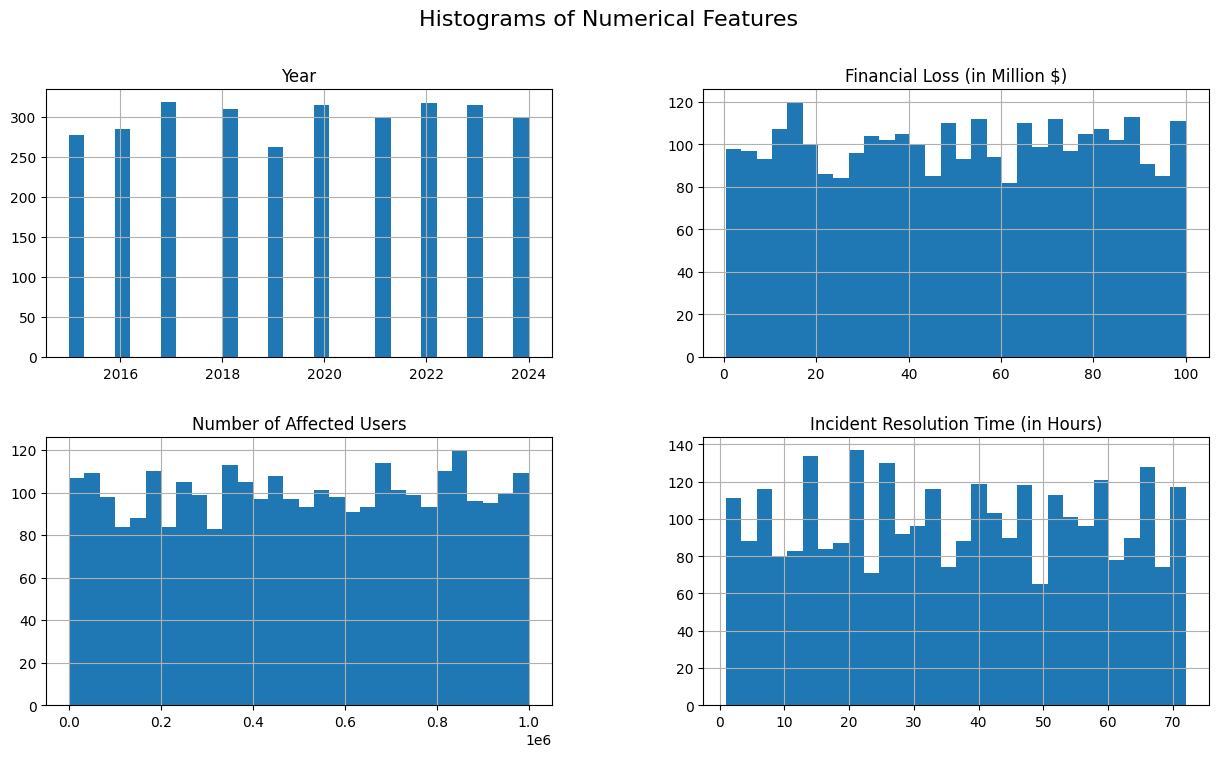

In [33]:
cyber[num_cols].hist(bins=30, figsize=(15, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

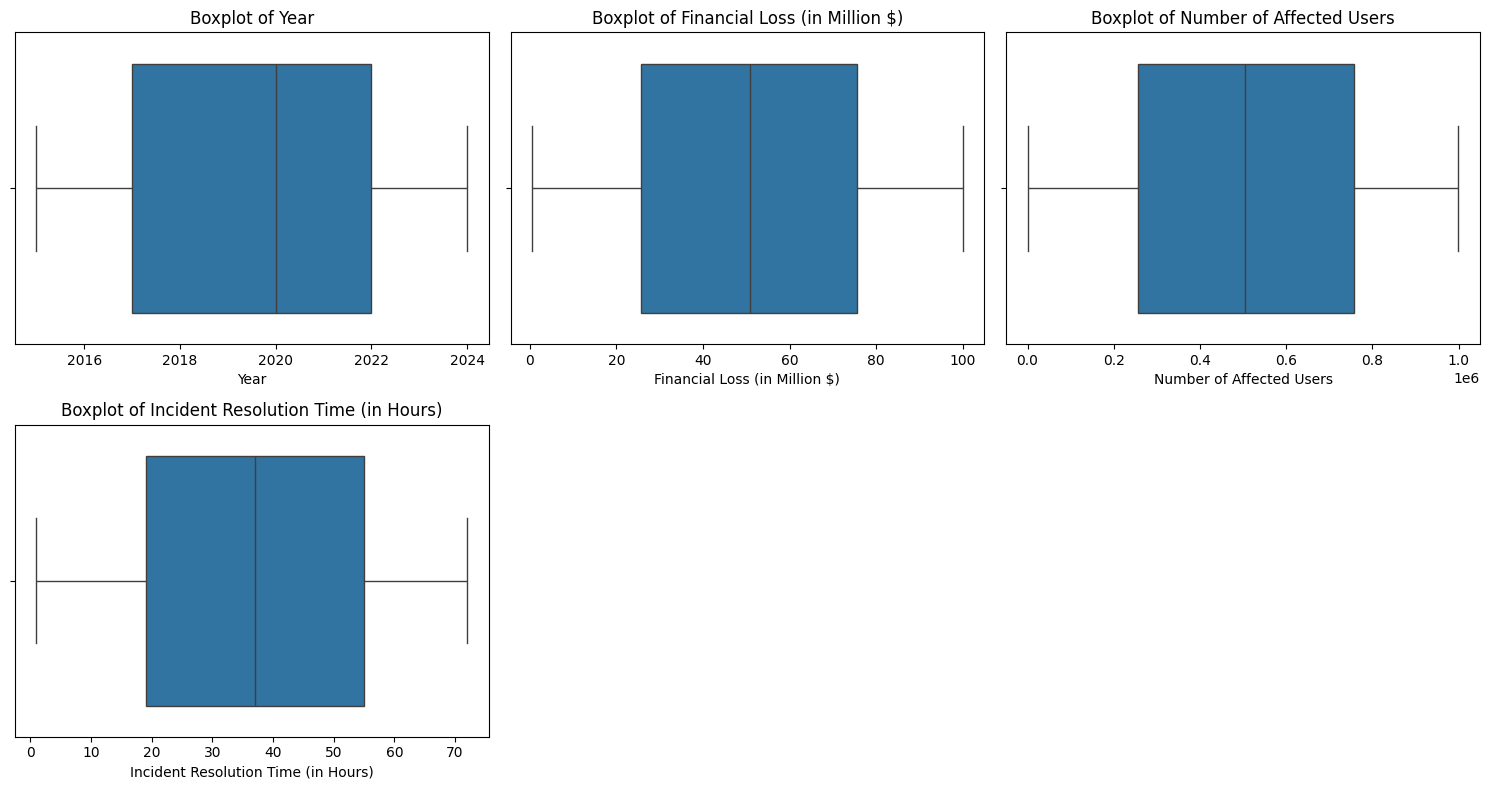

In [34]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=cyber[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


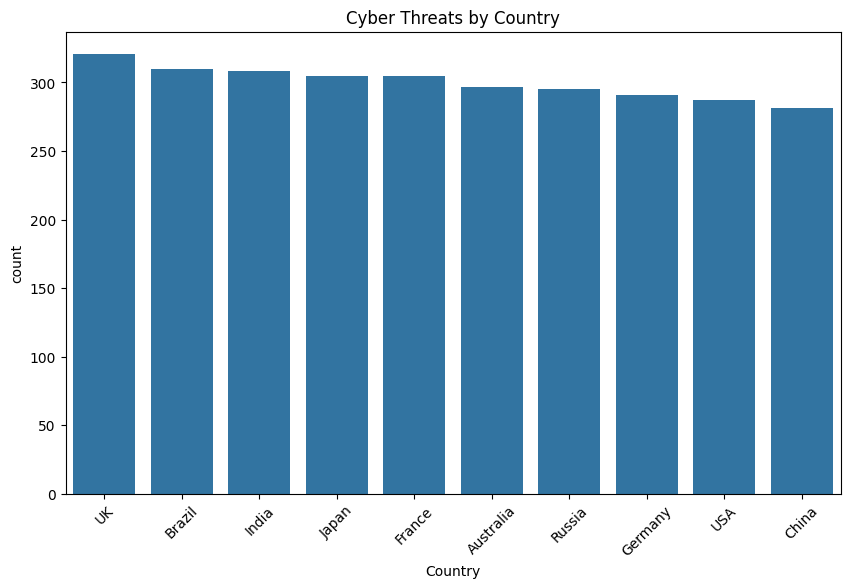

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=cyber, order=cyber['Country'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Cyber Threats by Country")
plt.show()

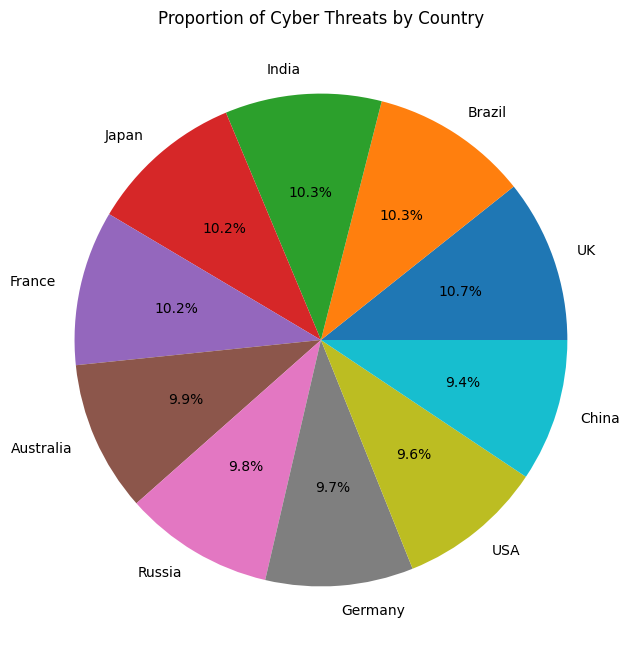

In [36]:
x = cyber['Country'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.title("Proportion of Cyber Threats by Country")
plt.show()

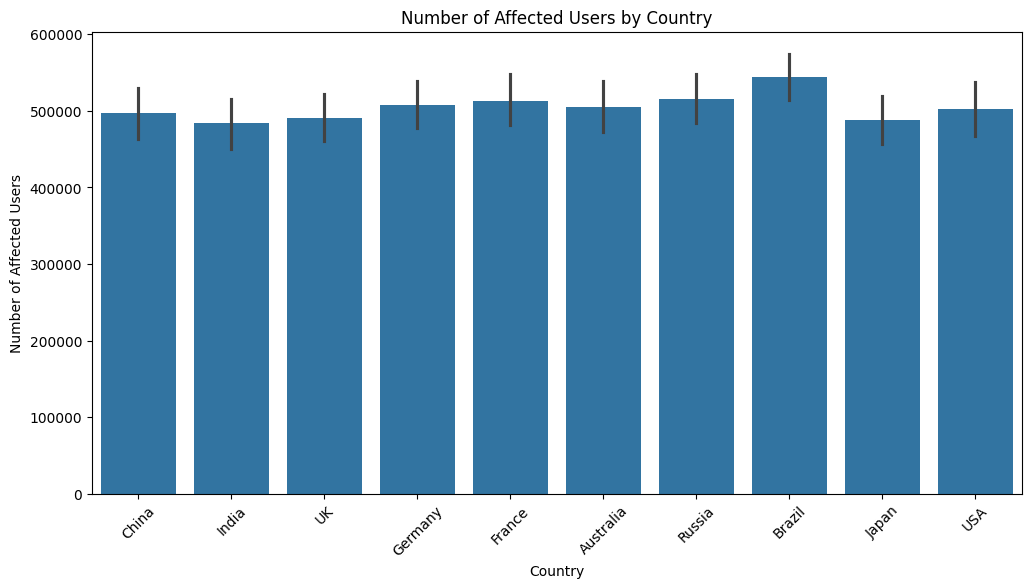

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Number of Affected Users', data=cyber)
plt.xticks(rotation=45)
plt.title("Number of Affected Users by Country")
plt.show()


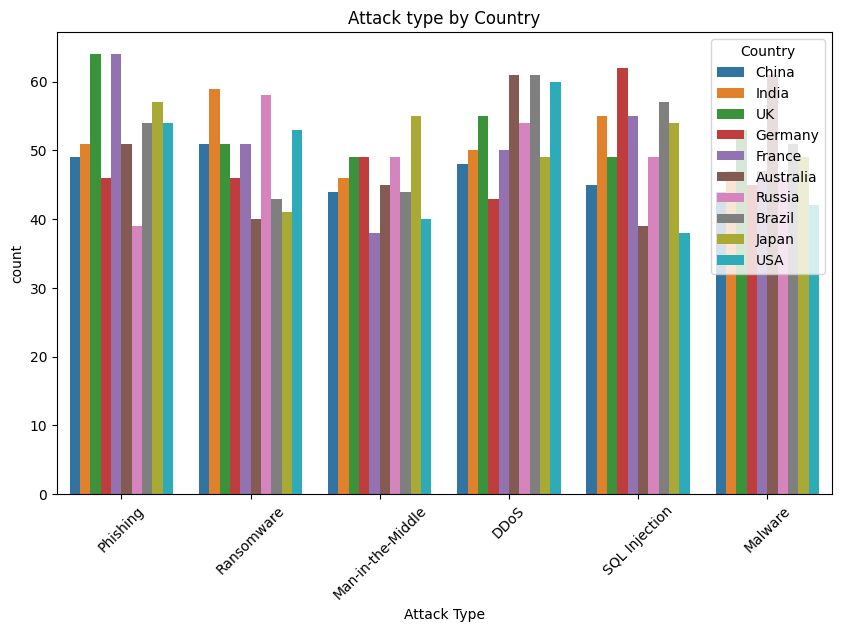

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Attack Type', hue='Country', data=cyber)
plt.title("Attack type by Country")
plt.xticks(rotation=45)
plt.show()

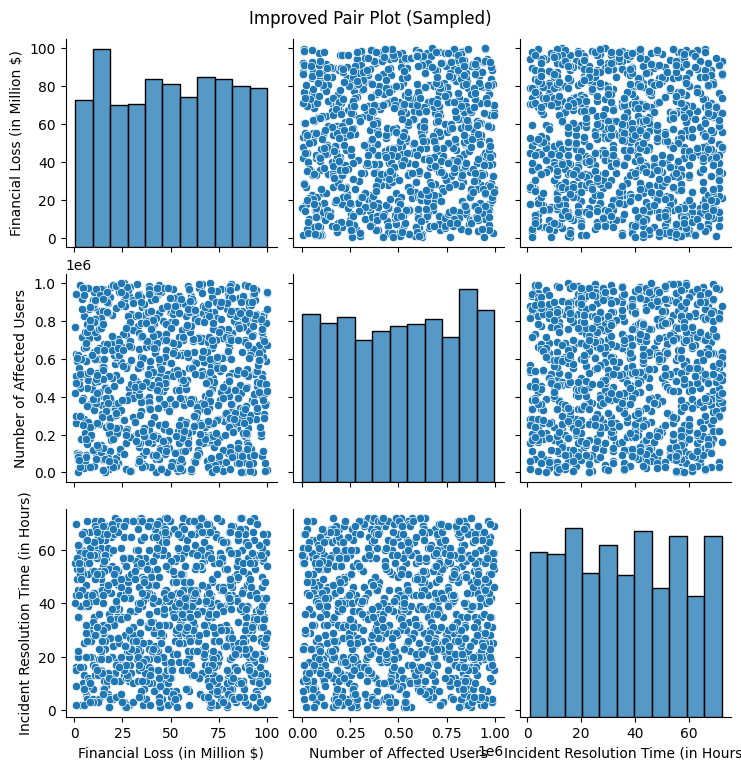

In [39]:
sampled = cyber.sample(1000)
num_cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
sns.pairplot(sampled[num_cols])
plt.suptitle("Improved Pair Plot (Sampled)", y=1.02)
plt.show()

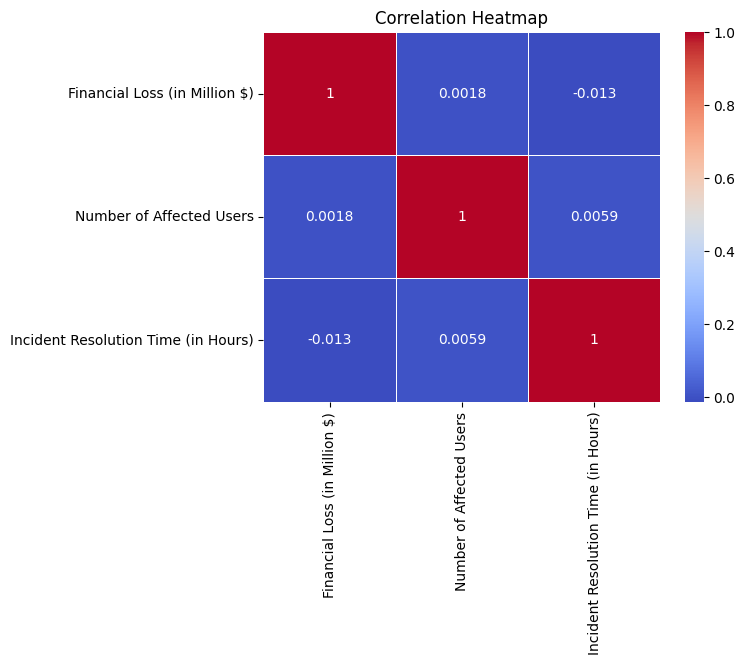

In [40]:
sns.heatmap(cyber[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [41]:
pca_data = cyber[num_cols].dropna()

In [44]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(pca_data)

In [45]:
pca = decomposition.PCA(n_components=2)
components = pca.fit_transform(scaled_data)

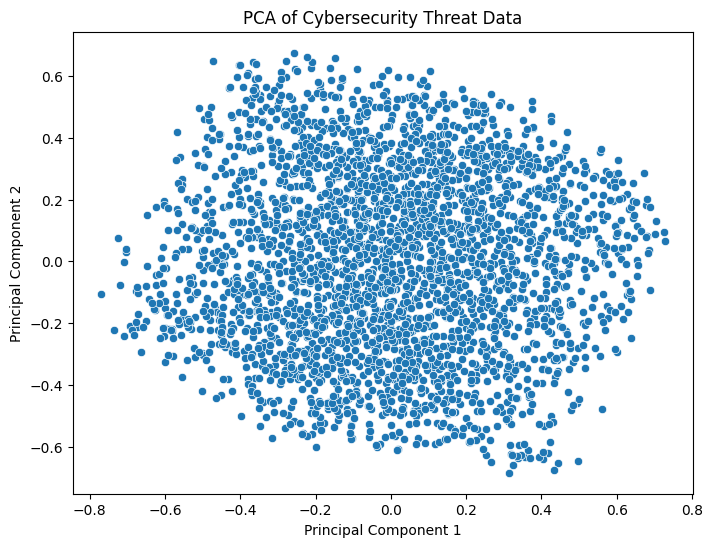

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1])
plt.title("PCA of Cybersecurity Threat Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()